#**Descriptive statistics**


1. Calculate summary statistics (mean, median, mode, range) for numerical fields.

2. Analyze categorical fields such as quality, stage, source, and product.

In [58]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [4]:
pd.set_option('display.max_columns', None) #display all columns (so that they are not hidden with «…»)

In [5]:
# Universal function for descriptive statistics of numerical fields
def numeric_summary(df, cols):
    rows = []
    for col in cols:
        s = pd.to_numeric(df[col], errors='coerce').dropna()
        if not s.empty:
            rows.append({
                "Column": col,
                "Count": int(s.count()),
                "Mean": round(s.mean(), 3),
                "Median": round(s.median(), 3),
                "Mode": s.mode().iloc[0] if not s.mode().empty else np.nan,
                "Min": s.min(),
                "Max": s.max(),
                "Range": s.max() - s.min(),
                "Std": round(s.std(), 3),
                "Q1": round(s.quantile(0.25), 3),
                "Q3": round(s.quantile(0.75), 3)
            })
    return pd.DataFrame(rows)


def cat_counts(df, col):
    t = df[col].value_counts(dropna=False).reset_index()
    t.columns = [col,'Count']
    t['Percent'] = (t['Count']/t['Count'].sum()*100).round(2)
    return t

##**1. Contacts - Descriptive Statistics**

In [6]:
contacts = pd.read_pickle("contacts_df.pkl")

In [7]:
# 1.1 Basic Info
print("General Info:")
contacts.info()

General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  object        
 1   Contact Owner Name  18548 non-null  category      
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       18548 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), object(1)
memory usage: 453.2+ KB


In [8]:
contacts.head()

Id Contact Owner Name        Created Time  \
0  5805028000000645014       Rachel White 2023-06-27 11:28:00   
1  5805028000000872003      Charlie Davis 2023-07-03 11:31:00   
2  5805028000000889001          Bob Brown 2023-07-02 22:37:00   
3  5805028000000907006          Bob Brown 2023-07-03 05:44:00   
4  5805028000000939010         Nina Scott 2023-07-04 10:11:00   

        Modified Time  
0 2023-12-22 13:34:00  
1 2024-05-21 10:23:00  
2 2023-12-21 13:17:00  
3 2023-12-29 15:20:00  
4 2024-04-16 16:14:00

In [9]:
# 1.2 Categorical: Contact Owner Name
owner_counts = contacts['Contact Owner Name'].value_counts(dropna=False).reset_index()
owner_counts.columns = ['Contact Owner Name', 'Count']
owner_counts['Percent'] = round(owner_counts['Count'] / owner_counts['Count'].sum() * 100, 2)

print("\nСontacts per Owner:")
display(owner_counts)


Сontacts per Owner:


Contact Owner Name  Count  Percent
0       Charlie Davis   2018    10.88
1       Ulysses Adams   1816     9.79
2        Julia Nelson   1769     9.54
3     Paula Underwood   1487     8.02
4      Quincy Vincent   1416     7.63
5          Nina Scott   1150     6.20
6            Ben Hall   1038     5.60
7       Victor Barnes    967     5.21
8        Cara Iverson    880     4.74
9        Rachel White    782     4.22
10         Jane Smith    754     4.07
11          Bob Brown    685     3.69
12         Ian Miller    684     3.69
13        Diana Evans    678     3.66
14       Yara Edwards    655     3.53
15          Amy Green    621     3.35
16           Eva Kent    365     1.97
17       Kevin Parker    325     1.75
18      Mason Roberts    217     1.17
19        George King    144     0.78
20          Sam Young     37     0.20
21      Alice Johnson     27     0.15
22      Oliver Taylor     19     0.10
23     Zachary Foster      8     0.04
24        Wendy Clark      2     0.01
25         Tina Zhang      2     0.01
26        Derek James      1     0.01
27            Unknown      1     0.01

In [10]:
# Visualization: Contacts by Owner
fig = px.bar(owner_counts, x='Contact Owner Name', y='Count', color='Percent', title='Distribution of Contacts by Owner', text='Percent')
fig.update_layout(xaxis_title="Contact Owner", yaxis_title="Number of Contacts")
fig.show()

**Итог:**

- Таблица с владельцами контактов → количество + процент.

- Bar-chart → наглядно показывает, кто ведёт больше всего контактов.

##**2. Calls - Descriptive Statistics**

In [11]:
calls = pd.read_pickle("calls_df.pkl")

In [12]:
# 2.1 Basic Info
print("General Info:")
calls.info()

General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  object        
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  category      
 3   CONTACTID                   91941 non-null  object        
 4   Call Type                   95874 non-null  category      
 5   Call Duration (in seconds)  95874 non-null  int64         
 6   Call Status                 95874 non-null  category      
 7   Outgoing Call Status        95874 non-null  category      
 8   Scheduled in CRM            95874 non-null  category      
 9   _missing_contact            95874 non-null  bool          
dtypes: bool(1), category(5), datetime64[ns](1), int64(1), object(2)
memory usage: 3.5+ MB


In [13]:
calls.head()

Id     Call Start Time Call Owner Name  \
0  5805028000000805001 2023-06-30 08:43:00        John Doe   
1  5805028000000768006 2023-06-30 08:46:00        John Doe   
2  5805028000000764027 2023-06-30 08:59:00        John Doe   
3  5805028000000787003 2023-06-30 09:20:00        John Doe   
4  5805028000000768019 2023-06-30 09:30:00        John Doe   

             CONTACTID Call Type  Call Duration (in seconds)  \
0                  NaN   Inbound                         171   
1                  NaN  Outbound                          28   
2                  NaN  Outbound                          24   
3  5805028000000645014  Outbound                           6   
4  5805028000000645014  Outbound                          11   

        Call Status Outgoing Call Status Scheduled in CRM  _missing_contact  
0          Received              Unknown          Unknown              True  
1  Attended Dialled            Completed               NO              True  
2  Attended Dialled            Completed               NO              True  
3  Attended Dialled            Completed               NO             False  
4  Attended Dialled            Completed               NO             False

In [14]:
# 2.2 Numeric Summary: Call Duration (seconds)
num_cols = ['Call Duration (in seconds)']
calls_numeric_summary = numeric_summary(calls, num_cols)
print("Numeric Summary (Calls):")
display(calls_numeric_summary)

Numeric Summary (Calls):


Column  Count     Mean  Median  Mode  Min   Max  Range  \
0  Call Duration (in seconds)  95874  164.835     8.0     0    0  7625   7625   

       Std   Q1    Q3  
0  401.266  4.0  97.0

In [15]:
# 2.3 Distribution of Call Duration (Histogram)
dur = calls['Call Duration (in seconds)'].dropna()

fig = px.histogram(dur, x=dur, nbins=40, title="Distribution of Call Duration (seconds)")
fig.update_layout(xaxis_title="Duration (seconds)", yaxis_title="Count")
fig.show()

- Большая часть звонков имеет длительность около **1 min**, что отражает значительное количество коротких или прерванных разговоров.  
- Небольшая доля звонков длится дольше 3–5 min, что можно интерпретировать как более содержательные взаимодействия с клиентами.  
- Длинные хвосты распределения указывают на редкие, но очень продолжительные звонки.  
- Таким образом, распределение длительности показывает смешанную картину: **преобладание коротких звонков** и меньшая доля «глубоких» разговоров.  


In [16]:
# Boxplot (by Call Status if available)
fig = px.box(calls.dropna(subset=['Call Duration (in seconds)']), x='Call Status', y='Call Duration (in seconds)', title="Call Duration by Call Status")
fig.update_layout(xaxis_title="Call Status", yaxis_title="Duration (seconds)")
fig.show()

- **9 Сall Status**  закономерно имеют длительность **0 секунд**, что подтверждает их как неуспешные соединения.  
- **Attended Dialled** и **Received** звонки показывают медианную длительность около **180 секунд (3 минуты)**, отражая реальные разговоры.  
- На графике присутствуют единичные экстремальные значения (очень длинные звонки), поэтому ограничим ось по 95-му перцентилю для лучшей читаемости.  


In [66]:
col_dur = 'Call Duration (in seconds)'
assert col_dur in calls.columns, f"Column '{col_dur}' not found"
calls[col_dur] = pd.to_numeric(calls[col_dur], errors='coerce')

# Boxplot for ALL calls (95th percentile cap)
dur_all = calls.dropna(subset=[col_dur]).copy()

q95_all = dur_all[col_dur].quantile(0.95)
fig = px.box(dur_all, x='Call Status' if 'Call Status' in dur_all.columns else None, y=col_dur, title="Call Duration by Call Status — All Calls (95th percentile cap)")
fig.update_layout(xaxis_title="Call Status", yaxis_title="Duration (seconds)")
fig.update_yaxes(range=[0, q95_all])  # cap to make plot readable
fig.show()

- Отфильтруем нулевые значения   
- Такой график лучше отражает **фактическую нагрузку менеджеров**, так как учитывает только звонки, где разговор действительно состоялся.  



In [67]:
# Focused view: only 'real conversations' (non-zero & talk statuses)
talk_statuses = ['Attended Dialled', 'Received', 'Scheduled Attended', 'Scheduled Attended Delay']

mask_talk = True
if 'Call Status' in calls.columns:
    mask_talk = calls['Call Status'].isin(talk_statuses)

dur_real = calls[mask_talk & (calls[col_dur] > 0)].dropna(subset=[col_dur]).copy()

q95_real = dur_real[col_dur].quantile(0.95) if len(dur_real) else np.nan

fig = px.box(dur_real, x='Call Status', y=col_dur, title="Call Duration by Call Status — Real Talks Only (non-zero, 95th percentile cap)")
fig.update_layout(xaxis_title="Call Status", yaxis_title="Duration (seconds)")
fig.update_yaxes(range=[0, q95_real])
fig.show()

In [18]:
# 2.4 Categorical Distributions
cat_cols = ['Call Status', 'Call Type', 'Call Owner Name', 'Outgoing Call Status', 'Scheduled in CRM']

In [19]:
for col in cat_cols:
    tbl = cat_counts(calls, col)
    print(f"\n{col} — distribution:")
    display(tbl)

    fig = px.bar(tbl, x=col, y='Count', color='Percent', title=f"Distribution of {col}", text='Percent')
    fig.update_layout(xaxis_title=col, yaxis_title="Count")
    fig.show()


Call Status — distribution:


Call Status  Count  Percent
0             Attended Dialled  70703    73.75
1           Unattended Dialled  16030    16.72
2                       Missed   5922     6.18
3                     Received   3077     3.21
4                      Overdue     60     0.06
5     Scheduled Attended Delay     22     0.02
6                    Cancelled     20     0.02
7   Scheduled Unattended Delay     17     0.02
8           Scheduled Attended     14     0.01
9         Scheduled Unattended      6     0.01
10                   Scheduled      3     0.00


Call Type — distribution:


Call Type  Count  Percent
0  Outbound  86875    90.61
1    Missed   5921     6.18
2   Inbound   3078     3.21


Call Owner Name — distribution:


Call Owner Name  Count  Percent
0      Yara Edwards   9059     9.45
1      Julia Nelson   7446     7.77
2        Ian Miller   7215     7.53
3     Charlie Davis   7213     7.52
4       Diana Evans   6857     7.15
5     Ulysses Adams   6085     6.35
6         Amy Green   5982     6.24
7        Nina Scott   5581     5.82
8     Victor Barnes   5439     5.67
9      Kevin Parker   5406     5.64
10  Paula Underwood   4580     4.78
11   Quincy Vincent   4384     4.57
12       Jane Smith   3753     3.91
13     Cara Iverson   3300     3.44
14         John Doe   2986     3.11
15         Ben Hall   2947     3.07
16    Alice Johnson   1251     1.30
17    Mason Roberts   1166     1.22
18      Derek James    948     0.99
19      George King    850     0.89
20   Zachary Foster    523     0.55
21         Eva Kent    498     0.52
22    Fiona Jackson    470     0.49
23        Sam Young    457     0.48
24     Rachel White    441     0.46
25      Xander Dean    304     0.32
26     Ethan Harris    280     0.29
27       Hannah Lee    175     0.18
28      Wendy Clark    162     0.17
29        Bob Brown     99     0.10
30    Oliver Taylor     10     0.01
31       Tina Zhang      5     0.01
32      Laura Quinn      2     0.00


Outgoing Call Status — distribution:


Outgoing Call Status  Count  Percent
0            Completed  86792    90.53
1              Unknown   8999     9.39
2              Overdue     60     0.06
3            Cancelled     20     0.02
4            Scheduled      3     0.00


Scheduled in CRM — distribution:


Scheduled in CRM  Count  Percent
0               NO  86733    90.47
1          Unknown   8999     9.39
2              Yes    142     0.15

In [20]:
# 2.5 Additional KPIs (optional but useful)

# Median duration by Call Status
if {'Call Status', 'Call Duration (in seconds)'}.issubset(calls.columns):
    kpi_med = (calls.dropna(subset=['Call Duration (in seconds)']).groupby('Call Status', observed=False)['Call Duration (in seconds)'].median().reset_index(name='Median Duration (s)').sort_values('Median Duration (s)', ascending=False))
    print("Median Call Duration by Call Status (seconds):")
    display(kpi_med)

# Share of calls with missing CONTACTID (operational signal)
if 'CONTACTID' in calls.columns:
    calls['_missing_contact'] = calls['CONTACTID'].isna()
    miss_share = calls['_missing_contact'].mean() * 100
    print(f"Share of calls without CONTACTID: {miss_share:.2f}%")


Median Call Duration by Call Status (seconds):


Call Status  Median Duration (s)
4                     Received                179.0
5                    Scheduled                 21.0
0             Attended Dialled                 17.0
6           Scheduled Attended                  1.0
7     Scheduled Attended Delay                  1.0
2                       Missed                  0.0
1                    Cancelled                  0.0
3                      Overdue                  0.0
8         Scheduled Unattended                  0.0
9   Scheduled Unattended Delay                  0.0
10          Unattended Dialled                  0.0

Share of calls without CONTACTID: 4.10%


**Итог:**

- Посчитали mean/median/mode/range/std для длительности звонка.

- Показали распределение длительности (гистограмма) и разброс по статусам (boxplot).

- Анализ категориальных полей (Call Status, Call Type, Call Owner Name, Outgoing Call Status, Scheduled in CRM) с долями в %.

- (optional): Медиа́на длительности по статусам и доля звонков без CONTACTID (чтобы контролировать качество привязки).

##**3. Spend - Descriptive Statistics**




In [21]:
spend = pd.read_pickle("spend_df.pkl")

In [22]:
# 3.1 Basic Info
print("General Info:")
spend.info()

General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         19862 non-null  datetime64[ns]
 1   Source       19862 non-null  category      
 2   Campaign     19862 non-null  category      
 3   Impressions  19862 non-null  int64         
 4   Spend        19862 non-null  float64       
 5   Clicks       19862 non-null  int64         
 6   AdGroup      19862 non-null  category      
 7   Ad           19862 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 719.9 KB


In [23]:
spend.head()

Date        Source               Campaign  Impressions  Spend  Clicks  \
0 2023-07-03    Google Ads         gen_analyst_DE            6   0.00       0   
1 2023-07-03    Google Ads  performancemax_eng_DE            4   0.01       1   
2 2023-07-03  Facebook Ads                Unknown            0   0.00       0   
3 2023-07-03    Google Ads                Unknown            0   0.00       0   
4 2023-07-03           CRM                Unknown            0   0.00       0   

   AdGroup       Ad  
0  Unknown  Unknown  
1  Unknown  Unknown  
2  Unknown  Unknown  
3  Unknown  Unknown  
4  Unknown  Unknown

In [68]:
# 3.1 Numeric Fields
num_cols = ['Impressions','Clicks','Spend']
summary_tbl = numeric_summary(spend, num_cols)
display(summary_tbl)

Column  Count      Mean  Median  Mode  Min       Max     Range  \
0  Impressions  19862  2571.695   82.00   0.0  0.0  431445.0  431445.0   
1       Clicks  19862    25.096    2.00   0.0  0.0    2415.0    2415.0   
2        Spend  19862     7.528    0.74   0.0  0.0     774.0     774.0   

         Std   Q1      Q3  
0  11691.227  1.0  760.75  
1     87.032  0.0   13.00  
2     27.325  0.0    6.16

In [69]:
# CTR и CPC
spend['CTR'] = np.where(spend['Impressions'] > 0, spend['Clicks'] / spend['Impressions'], np.nan)
spend['CPC'] = np.where(spend['Clicks'] > 0, spend['Spend'] / spend['Clicks'], np.nan)

display(numeric_summary(spend, ['CTR','CPC']))

Column  Count   Mean  Median  Mode  Min        Max      Range    Std    Q1  \
0    CTR  15028  0.017   0.008   0.0  0.0   1.000000   1.000000  0.047  0.00   
1    CPC  11971  0.682   0.487   0.0  0.0  26.666667  26.666667  0.916  0.24   

      Q3  
0  0.017  
1  0.820

In [26]:
# Global CTR и CPC
weighted_ctr = (spend['Clicks'].sum() / spend['Impressions'].sum()) * 100
global_cpc = spend['Spend'].sum() / spend['Clicks'].sum()
print(f"Weighted CTR (overall): {weighted_ctr:.2f}%")
print(f"Global CPC (overall): {global_cpc:.3f}")

Weighted CTR (overall): 0.98%
Global CPC (overall): 0.300


**CTR (Click-Through Rate)** = отношение количества кликов к количеству показов.

**Для чего он нужен:**

- Показатель эффективности рекламы: насколько часто пользователи кликают по объявлению, когда его видят.

- Помогает сравнить кампании, где количество показов разное (например, одна кампания имела 100 000 показов, другая — 1 000, но важнее то, сколько % людей кликнули).

- Если CTR низкий → реклама показывается, но пользователи не заинтересованы (плохой креатив/нецелевой трафик).

- Если CTR высокий → реклама хорошо «заходит» аудитории.

Важно: CTR показывает только интерес к рекламе, а не реальный результат (например, оплату). Поэтому его используют вместе с другими метриками: Cost per Click (CPC), Conversion Rate и т.д.

**Global CPC** — средняя стоимость клика по всему массиву (total Spend / total Clicks).

**Итог:**

- **Impressions:** медиана = 82, среднее = 2 572 → сильный перекос вправо. Большинство кампаний имеют ≤ 760 показов (75-й перцентиль), но редкие «гиганты» достигают 431 445 показов.  
- **Clicks:** медиана = 2, среднее = 25 → 75% кампаний имеют ≤ 13 кликов. Редкие кампании дают сотни и тысячи кликов (максимум 2 415).  
- **Spend:** медиана = 0.74, среднее = 7.53 → 75% кампаний имеют ≤ 6.16 расходов, но есть редкие крупные с расходами до 774.  
- **CTR:** медиана = 0.8%, среднее = 1.7% → большинство кампаний имеют CTR <1%, но есть единичные с CTR до 100%.  
 Вывод: распределения сильно скошены, доминируют маленькие кампании, а редкие выбросы формируют «длинные хвосты».  



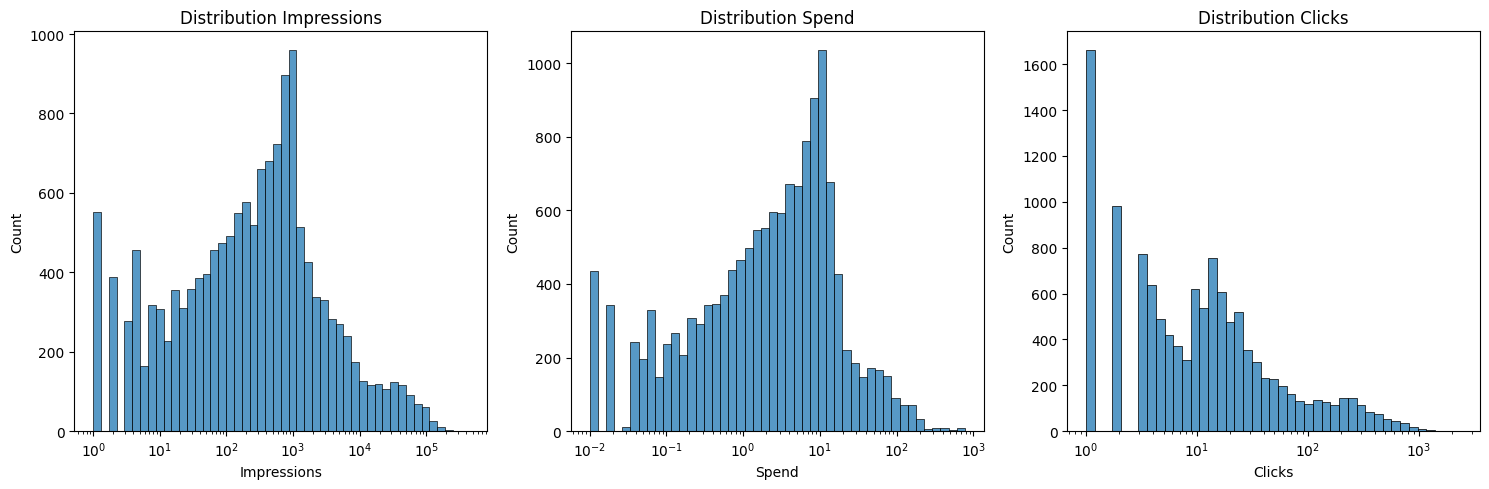

In [28]:
# 3.2 Histograms
# Use sns.histplot() with a logarithmic scale for impressions and clicks to smooth the impact of large values (431,445 and 2,415)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, ['Impressions', 'Spend', 'Clicks']):
  sns.histplot(data=spend, x=col, ax=ax, log_scale=True)
  ax.set_title(f'Distribution {col}')
plt.tight_layout()
plt.show()


In [70]:
# 3.3 Correlation
corr_cols = ['Impressions','Clicks','Spend','CTR','CPC']
corr_mat = spend[corr_cols].corr(numeric_only=True)
fig = px.imshow(corr_mat, text_auto=True, color_continuous_scale="YlOrRd", title="Correlation Heatmap", aspect="auto")
fig.show()

### Correlation between Metrics

- **Impressions ↔ Clicks:** высокая положительная корреляция (~0.89) — чем больше показов, тем больше кликов.  
- **Spend ↔ Clicks:** умеренная положительная корреляция (~0.59) — рост бюджета в среднем увеличивает число кликов.  
- **Impressions ↔ Spend:** средняя корреляция (~0.53) — охват и расходы связаны, но не идеально (бывают показы без трат и траты при низких показах).  
- **CTR и CPC:** почти не коррелируют с Impressions/Spend → они отражают эффективность, а не масштаб.  
 Вывод: поведение «масштабных» метрик (Impressions, Spend) отличается от метрик эффективности (CTR, CPC).  


In [30]:
# 3.4 Categorical Fields
for col in ['Source','Campaign']:
    tbl = cat_counts(spend, col)
    display(tbl.head(20))
    fig = px.bar(tbl.head(15), x=col, y='Count', color='Percent', text='Percent', title=f"Distribution of {col} (top-15)")
    fig.show()



Source  Count  Percent
0     Facebook Ads   9569    48.18
1       Tiktok Ads   2985    15.03
2      Youtube Ads   1784     8.98
3       Google Ads   1266     6.37
4   Telegram posts    836     4.21
5          Webinar    766     3.86
6         Bloggers    632     3.18
7              SMM    571     2.87
8          Organic    514     2.59
9              CRM    355     1.79
10            Test    262     1.32
11     Partnership    234     1.18
12         Offline     61     0.31
13           Radio     27     0.14

Campaign  Count  Percent
0                       Unknown   5077    25.56
1             12.07.2023wide_DE   2073    10.44
2               02.07.23wide_DE   1685     8.48
3      04.07.23recentlymoved_DE   1398     7.04
4             youtube_shorts_DE   1223     6.16
5                07.07.23LAL_DE   1181     5.95
6                 03.07.23women   1171     5.90
7     12.09.23interests_Uxui_DE   1143     5.75
8                  15.07.23b_DE    529     2.66
9        24.09.23retargeting_DE    504     2.54
10        performancemax_eng_DE    355     1.79
11            20.03.2024wide_PL    240     1.21
12              30.11.23wide_DE    233     1.17
13         05.07.23interests_DE    214     1.08
14              17.03.24wide_AT    198     1.00
15              07.12.23test_DE    176     0.89
16  20.03.24interests_WebDev_PL    169     0.85
17                 discovery_DE    166     0.84
18          brand_search_eng_DE    146     0.74
19      08.04.24wide_webinar_DE    133     0.67

In [31]:
# By Spend
src_spend = spend.groupby('Source', observed=False)['Spend'].sum().sort_values(ascending=False).reset_index()
fig = px.bar(src_spend.head(15), x='Source', y='Spend', title="Top Sources by Total Spend")
fig.show()

camp_spend = spend.groupby('Campaign', observed=False)['Spend'].sum().sort_values(ascending=False).reset_index()
fig = px.bar(camp_spend.head(15), x='Campaign', y='Spend', title="Top Campaigns by Total Spend (top-15)")
fig.show()

### Analysis by Sources and Campaigns

- **Sources:**  
  - Google Ads и Facebook Ads дают основную часть расходов.    
- **Campaigns:**  
  - Наибольшие расходы сосредоточены в крупных кампаниях: *performancemax_eng_DE*, *youtube_shorts_DE*, *discovery_DE*.  
  - Есть кампания *Unknown* с очень высоким расходами → требует проверки качества данных.  
 Вывод: бюджет распределён неравномерно — несколько кампаний «съедают» до 60% расходов.  


In [32]:
# 3.5 CTR by Source
src_stats = spend.groupby('Source', observed=False).agg(Impressions=('Impressions','sum'), Clicks=('Clicks','sum'), Spend=('Spend','sum')).reset_index()

src_stats['CTR'] = (src_stats['Clicks'] / src_stats['Impressions'] * 100).round(2)
threshold = 100_000
src_thr = src_stats[src_stats['Impressions'] >= threshold].sort_values('CTR', ascending=False)

fig = px.bar(src_thr, x='Source', y='CTR', color='CTR', text='CTR', title=f"CTR by Source (Impressions ≥ {threshold})")
fig.show()


### CTR by Source (Impressions ≥ 100k)

- **Telegram posts:** CTR = 2.38% → самый высокий показатель среди крупных источников.  
- **Bloggers:** CTR = 1.93% → также выше среднего.  
- **Facebook Ads:** CTR = 1.69% при значительном охвате.  
- **Google Ads:** CTR = 0.76%, YouTube Ads = 0.68%, TikTok Ads = 0.56% → низкая кликабельность.  
Вывод: лидеры по кликабельности — Telegram и Bloggers, а традиционные платформы (Google, YouTube, TikTok) отстают по CTR.  


In [33]:
# 3.6 CPC by Source
cpc_stats = spend.groupby('Source', observed=False).agg(Impressions=('Impressions','sum'), Clicks=('Clicks','sum'), Spend=('Spend','sum')).reset_index()

cpc_stats['CPC'] = np.where(cpc_stats['Clicks']>0, cpc_stats['Spend']/cpc_stats['Clicks'], np.nan)
cpc_thr = cpc_stats[cpc_stats['Impressions'] >= threshold].sort_values('CPC')

fig = px.bar(cpc_thr, x='Source', y='CPC', color='CPC', text=cpc_thr['CPC'].round(2), title=f"CPC by Source (Impressions ≥ {threshold})")
fig.show()


### CPC by Source (Impressions ≥ 100k)

- Google Ads, YouTube Ads:  
  - Самые дешёвые клики (CPC ~0.23–0.25), но CTR низкий (<1%).  
  - Итог: дают трафик по низкой цене, но слабо вовлекают аудиторию.  

- Telegram posts, TikTok Ads:  
  - CPC средний (~0.41–0.42), CTR выше Google/YouTube.  
  - Итог: более сбалансированные каналы — лучше кликают, при этом клики не слишком дорогие.  

- Facebook Ads:  
  - CTR ~1.7% (средний), CPC ~0.70 (дороже среднего).  
  - Итог: клики не самые дешёвые, но при большом охвате могут быть значимым источником.  

- Bloggers, Webinar:  
  - Высокий CTR (Bloggers ~1.9%), но клики дорогие (CPC ~0.89–0.94).  
  - Итог: могут приносить качественные лиды, но стоимость трафика выше.  


In [34]:
# 3.7 CTR vs CPC Scatter
src_stats['CTR (%)'] = (src_stats['Clicks']/src_stats['Impressions']*100).round(2)
src_stats['CPC'] = np.where(src_stats['Clicks']>0, src_stats['Spend']/src_stats['Clicks'], np.nan)
src_thr = src_stats[src_stats['Impressions'] >= threshold]

fig = px.scatter(src_thr, x='CTR (%)', y='CPC', text='Source', size='Impressions', color='Source', title=f"CTR vs CPC by Source (Impressions ≥ {threshold})")
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title="CTR (%) — Engagement", yaxis_title="CPC — Cost per Click")
fig.show()


**Scatter** показывает компромисс между «вовлечением» (CTR) и «ценой» (CPC).  
- Лучший баланс у Telegram posts (хороший CTR + умеренный CPC).  
- Google/YouTube дешёвые, но низкоэффективные.  
- Bloggers — кликабельные, но дорогие.

**Итог:**

 • Распределения сильно скошены — много «мелких» кампаний и редкие крупные выбросы.

 • Большой бюджет сосредоточен в Google Ads и Facebook Ads, но именно альтернативные каналы (Telegram, Bloggers) дают лучший CTR.

 • Google и YouTube обеспечивают трафик дешёво, но слабо вовлекают аудиторию.
 • Лучший баланс эффективности и стоимости у Telegram posts.

 • Кампанию с аномальным CTR («Unknown») нужно проверить — возможна ошибка данных или особый кейс.

## **4. Deals - Descriptive Statistics**

In [35]:
deals = pd.read_pickle("deals_df.pkl")

In [36]:
# 4.1 Basic Info
print("General Info:")
deals.info()

General Info:
<class 'pandas.core.frame.DataFrame'>
Index: 21593 entries, 0 to 21592
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Id                   21593 non-null  object         
 1   Deal Owner Name      21593 non-null  category       
 2   Closing Date         14645 non-null  datetime64[ns] 
 3   Quality              21593 non-null  category       
 4   Stage                21593 non-null  category       
 5   Lost Reason          21593 non-null  category       
 6   Campaign             21593 non-null  category       
 7   SLA                  21593 non-null  timedelta64[ns]
 8   Content              21593 non-null  category       
 9   Term                 21593 non-null  category       
 10  Source               21593 non-null  category       
 11  Payment Type         21593 non-null  category       
 12  Product              21593 non-null  category       
 13  Educati

In [37]:
deals.head()

Id Deal Owner Name Closing Date            Quality  \
0  5805028000056864695        Ben Hall          NaT            Unknown   
1  5805028000056859489   Ulysses Adams          NaT            Unknown   
2  5805028000056832357   Ulysses Adams   2024-06-21     D - Non Target   
3  5805028000056824246        Eva Kent   2024-06-21  E - Non Qualified   
4  5805028000056873292        Ben Hall   2024-06-21     D - Non Target   

      Stage     Lost Reason                  Campaign  \
0  New Lead         Unknown             03.07.23women   
1  New Lead         Unknown                   Unknown   
2      Lost      Non target                engwien_AT   
3      Lost  Invalid number  04.07.23recentlymoved_DE   
4      Lost      Non target              discovery_DE   

                        SLA             Content           Term  \
0           0 days 00:00:00                 v16          women   
1           0 days 00:00:00             Unknown        Unknown   
2           0 days 00:26:43               b1-at     21_06_2024   
3 0 days 01:00:03.999999999  bloggersvideo14com  recentlymoved   
4 0 days 00:53:12.000000001             website        Unknown   

           Source Payment Type        Product Education Type  \
0    Facebook Ads      Unknown        Unknown        Unknown   
1         Organic      Unknown  Web Developer        Morning   
2  Telegram posts      Unknown        Unknown        Unknown   
3    Facebook Ads      Unknown        Unknown        Unknown   
4      Google Ads      Unknown        Unknown        Unknown   

         Created Time  Course duration  Months of study  Initial Amount Paid  \
0 2024-06-21 15:30:00                0                0                  NaN   
1 2024-06-21 15:23:00                6                0                  0.0   
2 2024-06-21 14:45:00                0                0                  NaN   
3 2024-06-21 13:32:00                0                0                  NaN   
4 2024-06-21 13:21:00                0                0                  NaN   

   Offer Total Amount         Contact Name     City Level of Deutsch  \
0                 NaN  5805028000056849495  Unknown          Unknown   
1              2000.0  5805028000056834471  Unknown          Unknown   
2                 NaN  5805028000056854421  Unknown          Unknown   
3                 NaN  5805028000056889351  Unknown          Unknown   
4                 NaN  5805028000056876176  Unknown          Unknown   

   _open_deal Payment Category Offer Category  _SLA_hours  
0        True          Unknown        Unknown    0.000000  
1        True       No Payment  Regular Offer    0.000000  
2       False          Unknown        Unknown    0.445278  
3       False          Unknown        Unknown    1.001111  
4       False          Unknown        Unknown    0.886667

In [38]:
#4.2 Numeric Fields
num_cols = ['Course duration','Months of study','Initial Amount Paid','Offer Total Amount']

for col in num_cols:
    if col in deals.columns:
        print(f"\n=== {col} ===")
        s = deals[col].dropna()
        print(f"Count: {s.count()}")
        print(f"Mean: {s.mean():.2f}")
        print(f"Median: {s.median():.2f}")
        print(f"Mode: {s.mode().iloc[0] if not s.mode().empty else np.nan}")
        print(f"Min: {s.min()}")
        print(f"Max: {s.max()}")
        print(f"Range: {s.max() - s.min()}")



=== Course duration ===
Count: 21593
Mean: 1.69
Median: 0.00
Mode: 0
Min: 0
Max: 11
Range: 11

=== Months of study ===
Count: 21593
Mean: 0.21
Median: 0.00
Mode: 0
Min: 0
Max: 11
Range: 11

=== Initial Amount Paid ===
Count: 4165
Mean: 950.81
Median: 1000.00
Mode: 1000.0
Min: 0.0
Max: 11500.0
Range: 11500.0

=== Offer Total Amount ===
Count: 4185
Mean: 7136.61
Median: 11000.00
Mode: 11000.0
Min: 0.0
Max: 11500.0
Range: 11500.0


In [39]:
# Проверка NaN в суммах
for col in ['Initial Amount Paid','Offer Total Amount']:
    if col in deals.columns:
        nan_share = deals[col].isna().mean() * 100
        print(f"{col}: Missing values = {nan_share:.1f}%")

Initial Amount Paid: Missing values = 80.7%
Offer Total Amount: Missing values = 80.6%


### Course Duration
- Среднее значение: ~1.7 мес.  
- Медиана = 0.  
- Мода = 0.  
-- Большинство сделок имеют значение «0» (курс не стартовал), но есть сделки с полным циклом (11 мес). Это подтверждает высокую долю несостоявшихся студентов.  

### Months of Study
- Среднее: ~0.2 мес.  
- Медиана и мода = 0.  
- Диапазон: 0 → 11 месяцев.
-- Большинство студентов либо вообще не начали обучение, либо учились совсем недолго.  

### Initial Amount Paid
- Заполненных записей: 4 165 (из ~21 500 → ~19% имеют данные).
- Среднее: 950.81.
- Медиана и мода: 1000.
- Диапазон: 0 → 11 500.
 Большая часть данных отсутствует (NaN). Среди тех, где данные есть, преобладают платежи около 1000. Значение «0» встречается, но оно указывает именно на отсутствие оплаты (а не на пустые данные).  

### Offer Total Amount
- Заполненных записей: 4 185 (около ~19% от всех сделок).
- Среднее: 7 136.61.
- Медиана и мода: 11 000.
- Диапазон: 0 → 11 500.
 Для большинства сделок сумма предложения в CRM не указана. В тех случаях, где данные есть, стандартное значение предложения фиксируется как 11 000. Значение «0» встречается, что можно трактовать как отсутствие финального оффера.

**Общий вывод**

- Важная находка: около 80% строк не содержат информации о суммах (NaN), что указывает на низкое качество заполнения CRM.

- Там, где данные внесены, структура выглядит логично:

-- первый взнос обычно около 1000,

-- полный оффер — около 11 000.

- В дальнейшем это позволит выделять сегменты: без оплаты / демо-доступ / полноценные платежи / отсутствуют данные.

Months of study


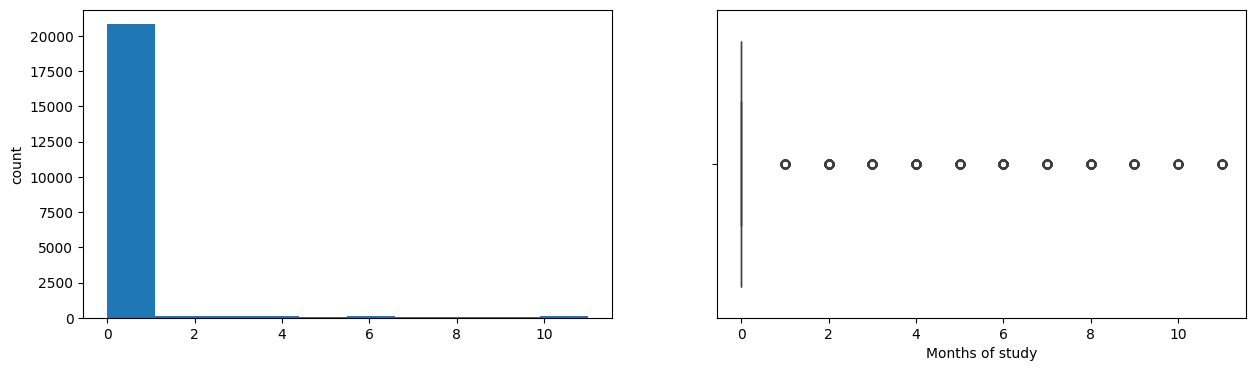

Initial Amount Paid


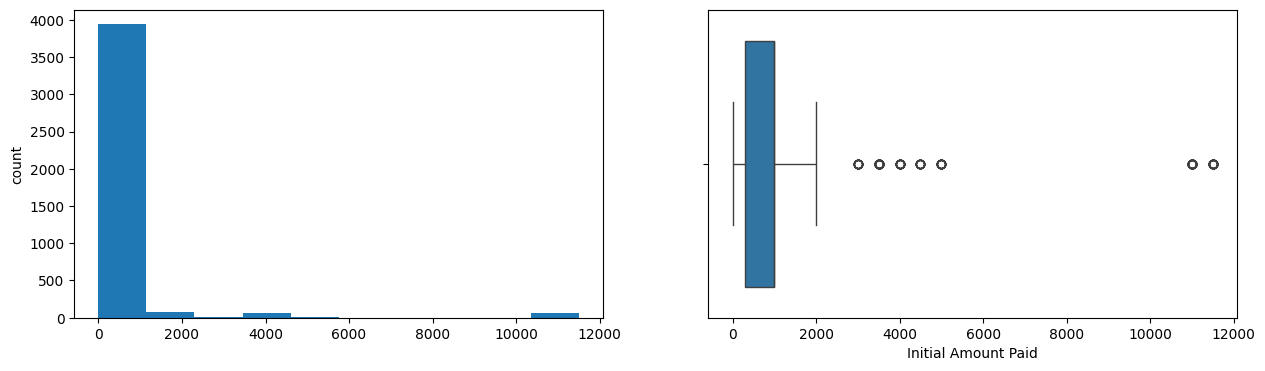

Offer Total Amount


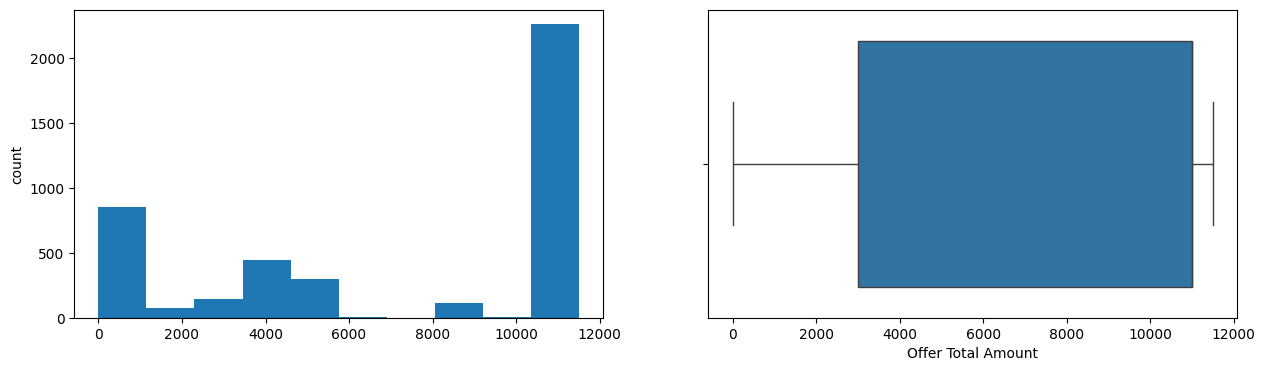

Course duration


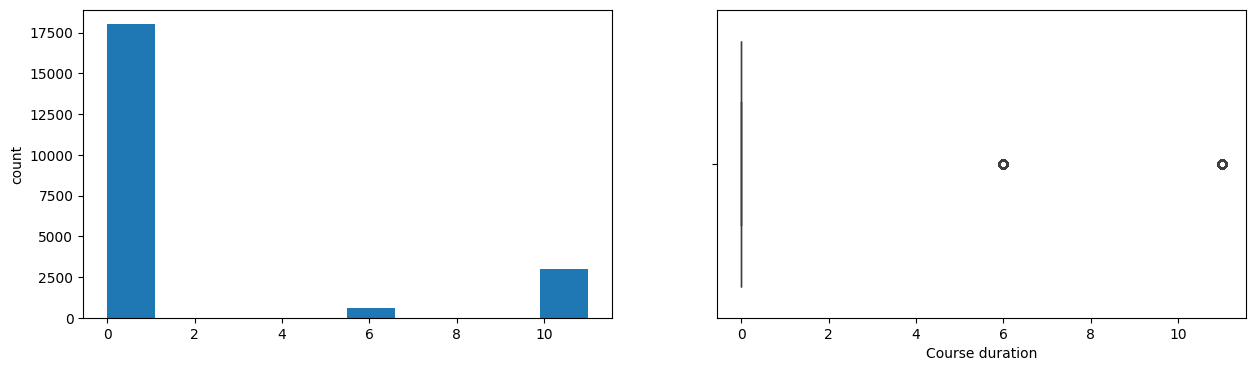

In [40]:
for col in ['Months of study', 'Initial Amount Paid', 'Offer Total Amount', 'Course duration']:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    deals[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=deals[col])
    plt.show()

In [54]:
# Categorical Fields

palette = {
    "orange": "#F5A623",   # основной цвет
    "line":   "#D9D9D9",   # тонкие рамки
    "bg":     "rgba(0,0,0,0)",  # прозрачный фон
    "char":   "#2E2E2E",   # текст
}

cat_cols = ['Quality','Stage','Source','Product']

for col in cat_cols:
    if col in deals.columns:
        print(f"\n=== {col} ===")
        counts = deals[col].value_counts(dropna=False)
        perc = (counts / len(deals) * 100).round(2)
        display(pd.DataFrame({'Count': counts, 'Percent': perc}))

        fig = px.bar(
            counts.head(15),
            x=counts.head(15).index,
            y=counts.head(15).values,
            text=perc.head(15).astype(str) + '%',
            title=f"Distribution of {col}")

        fig.update_traces(
            marker_color=palette["orange"],
            marker_line_color=palette["line"],
            marker_line_width=1.2,
            textposition="outside")

        fig.update_layout(
            title=dict(x=0.0, font=dict(size=18, color=palette["char"])),
            xaxis_title=col,
            yaxis_title="Count",
            font=dict(family="Arial", color=palette["char"]),
            paper_bgcolor=palette["bg"],
            plot_bgcolor=palette["bg"],
            margin=dict(l=60, r=40, t=60, b=60),

            xaxis=dict(
                showgrid=False,
                linecolor=palette["line"],
                tickfont=dict(color=palette["char"])),
            yaxis=dict(
                showgrid=False,
                zeroline=False,
                linecolor=palette["line"],
                tickfont=dict(color=palette["char"])))

        fig.show()





=== Quality ===


Count  Percent
Quality                          
E - Non Qualified   7634    35.35
D - Non Target      6248    28.94
C - Low             3459    16.02
Unknown             2253    10.43
B - Medium          1564     7.24
A - High             432     2.00
F                      3     0.01


=== Stage ===


Count  Percent
Stage                                    
Lost                       15743    72.91
Call Delayed                2248    10.41
Registered on Webinar       2072     9.60
Payment Done                 858     3.97
Waiting For Payment          325     1.51
Qualificated                 128     0.59
Registered on Offline Day    100     0.46
Need to Call - Sales          33     0.15
Need To Call                  31     0.14
Test Sent                     25     0.12
Need a consultation           23     0.11
New Lead                       6     0.03
Free Education                 1     0.00
Unknown                        0     0.00


=== Source ===


Count  Percent
Source                        
Facebook Ads     4850    22.46
Google Ads       4226    19.57
Organic          2590    11.99
Tiktok Ads       2051     9.50
SMM              1730     8.01
Youtube Ads      1657     7.67
CRM              1656     7.67
Bloggers         1089     5.04
Telegram posts   1001     4.64
Webinar           379     1.76
Partnership       203     0.94
Test              159     0.74
Offline             2     0.01
Unknown             0     0.00


=== Product ===


Count  Percent
Product                            
Unknown              18001    83.36
Digital Marketing     1990     9.22
UX/UI Design          1022     4.73
Web Developer          575     2.66
Find yourself in IT      4     0.02
Data Analytics           1     0.00

### Quality
- E — Non Qualified: ~35%  
- D — Non Target: ~29%  
- A + B (High + Medium): всего ~9%.  
 Большинство лидов низкого качества → проблема с квалификацией и маркетингом.  

### Stage
- Lost — ~73% сделок.  
- Payment Done — ~4%.  
- Остальные стадии («Call Delayed», «Registered on Webinar») суммарно ~20%.  
 Очень высокий процент потерь (почти 3/4 сделок). Только 1 из 25 доходит до оплаты.  

### Source
- Основные источники распределены неравномерно, часто встречается «Unknown».  
- Это снижает качество аналитики → необходимо улучшать заполнение в CRM.  

### Product
- ~83% сделок = «Unknown».  
- Наибольшая доля известных продуктов: «Digital Marketing» (~9%) и «UX/UI Design» (~5%).  
 CRM-система плохо фиксирует продуктовую информацию. Но Digital Marketing и UX/UI можно использовать как «флагманские» направления.  


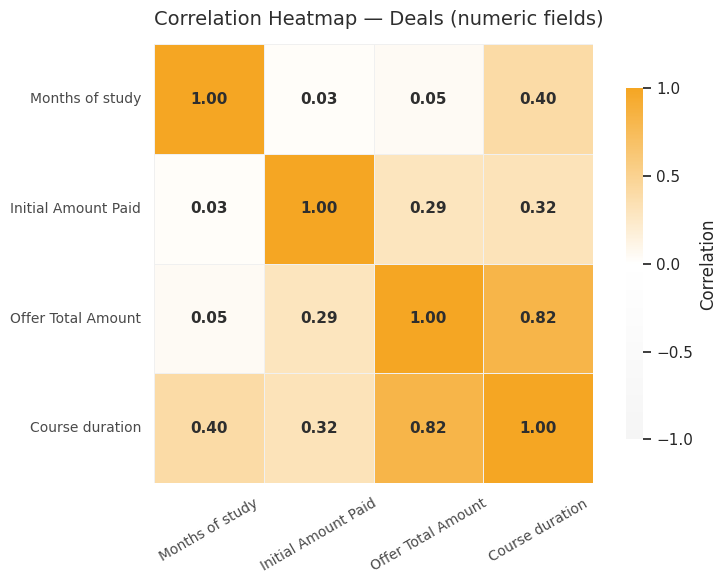

In [62]:
#4.4 Correlation between Numeric Fields

corr_cols = ['Months of study', 'Initial Amount Paid', 'Offer Total Amount', 'Course duration']
corr_matrix = deals[corr_cols].corr(numeric_only=True)

sns.set_theme(style="white")
plt.rcParams.update({"figure.facecolor": "white", "axes.facecolor": "white"})

orange_div = mcolors.LinearSegmentedColormap.from_list("orange_div", ["#F5F5F5", "#FFFFFF", "#F5A623"])
norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=orange_div,
    norm=norm,
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={
        "shrink": 0.8,
        "ticks": [-1, -0.5, 0, 0.5, 1],
        "label": "Correlation"},
    annot_kws={"fontsize": 11, "weight": "bold", "color": "#2E2E2E"},
    linewidths=0.4,
    linecolor="#F0F0F0")

ax.set_title("Correlation Heatmap — Deals (numeric fields)", pad=14,
             fontsize=14, color="#2E2E2E", loc="left")
ax.tick_params(axis='x', rotation=30, labelcolor="#4A4A4A", labelsize=10)
ax.tick_params(axis='y', rotation=0, labelcolor="#4A4A4A", labelsize=10)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

- **Course duration ↔ Offer Total Amount**: высокая положительная корреляция → чем дольше курс, тем выше стоимость.  
- **Initial Amount Paid ↔ Offer Total Amount**: средняя положительная корреляция → чем больше аванс, тем выше стоимость сделки.  
- **Months of study ↔ Initial Amount Paid**: слабая положительная корреляция → те, кто начали учёбу, чаще платили хотя бы аванс.  

Корреляции логичные и подтверждают бизнес-логику: длительные курсы и крупные авансы связаны с более дорогими сделками.  


In [65]:
# 4.5 Distribution of Loss Reasons

palette = {
    "gold":   "#FFDFA6",
    "orange": "#F5A623",
    "dark":   "#B86B00",
    "line":   "#D9D9D9",
    "char":   "#2E2E2E",
    "bg":     "rgba(0,0,0,0)"}

lost_deals = deals[deals['Stage'] == 'Lost'].copy()

if 'Lost Reason' in lost_deals.columns:
    loss_counts = (
        lost_deals['Lost Reason']
        .value_counts(dropna=False)
        .rename_axis('Loss Reason')
        .reset_index(name='Count'))
    total_lost = int(loss_counts['Count'].sum())
    loss_counts['Percent'] = (loss_counts['Count'] / total_lost * 100).round(1)

    fig = px.bar(
        loss_counts.sort_values('Count'),
        x='Count',
        y='Loss Reason',
        orientation='h',
        text=loss_counts.sort_values('Count').apply(lambda r: f"{int(r['Count'])} ({r['Percent']}%)", axis=1),
        color='Count',
        color_continuous_scale=[palette["gold"], palette["orange"], palette["dark"]])

    fig.update_traces(
        marker_line_color=palette["line"],
        marker_line_width=1.2,
        textposition="outside",
        cliponaxis=False)

    fig.update_layout(
        title=dict(
            text=f"Distribution of Loss Reasons — Total Lost Deals: {total_lost}",
            x=0.0, font=dict(size=18, color=palette["char"])),
        xaxis_title="Number of Deals",
        yaxis_title="Loss Reason",
        font=dict(family="Arial", color=palette["char"]),
        paper_bgcolor=palette["bg"],
        plot_bgcolor=palette["bg"],
        margin=dict(l=120, r=40, t=70, b=50),
        showlegend=False,
        coloraxis_showscale=False)

    fig.update_xaxes(
        showgrid=False, zeroline=False,
        linecolor=palette["line"], tickcolor=palette["line"])

    fig.update_yaxes(
        showgrid=False, zeroline=False,
        linecolor=palette["line"], tickcolor=palette["line"],
        categoryorder='array',
        categoryarray=loss_counts.sort_values('Count')["Loss Reason"].tolist())

    fig.update_traces(
        hovertemplate="<b>%{y}</b><br>Deals: %{x}<br>Share: %{text}<extra></extra>")

    fig.update_layout(width=900, height=600)
    fig.show()


**Total Lost Deals: 15 743**

### ТОП-причины
- **Doesn’t Answer — 4 074 (~25.9%)** → главная проблема на этапе первичного контакта.  
- **Changed Decision — 2 122 (~13.5%)**.  
- **Duplicate — 1 746 (~11.1%)**.  
- **Non target — 1 736 (~11.0%)**.  
- **Stopped Answering — 1 556 (~9.9%)**.  
- **Invalid number — 1 460 (~9.3%)**.  
- Остальные причины занимают <4% каждая (Expensive, Conditions not suitable, Needs time to think и др.).

### Группы причин
- **Коммуникация (~35.8%)**: Doesn’t Answer + Stopped Answering → проблема взаимодействия с лидами.  
- **Качество лидов (~34%)**: Duplicate + Non target + Invalid number → слабый таргетинг и некачественные контакты.  
- **Оффер и цена (~11.1%)**: Expensive + Conditions not suitable + Needs time to think → необходимость доработки ценностного предложения.  
- **Барьеры (~1–2%)**: Does not speak English, Does not know how to use a computer → отдельные сегменты требуют иной коммуникации.

### Рекомендации
1. **Коммуникация:** ввести многошаговый процесс контакта (звонок → мессенджер → email → повторный звонок), авто-напоминания, контроль скорости ответа (первые 15–30 минут после заявки).  
2. **Качество лидов:** включить автоматическую проверку номеров, дедупликацию заявок, более строгий таргетинг и фильтры в форме заявки.  
3. **Оффер и цена:** подготовить FAQ по стоимости и рассрочке, показывать примеры успеха выпускников, обучить менеджеров работе с возражениями.  
4. **CRM-практика:** оптимизировать список причин «Lost» (убрать дубли, контролировать обязательность заполнения).
Основной **вывод**: **почти 2/3 всех потерь вызваны либо отсутствием контакта, либо плохим качеством лида**. Улучшение коммуникации и фильтрации контактов может дать значительный прирост конверсии.
